### Recurrent Neural Networks

#### Notations

$$
\mathbf{x}^{(i)} =
\begin{bmatrix}
\vert   & \vert   &         & \vert   \\
x^{<1>} & x^{<2>} & \cdots  & x^{<T_{\mathbf x}>} \\
\vert   & \vert   &         & \vert   \\
\end{bmatrix}_{n \times T_{\mathbf x}}

\mathbf{y}^{(i)} =
\begin{bmatrix}
\vert   & \vert   &         & \vert   \\
y^{<1>} & y^{<2>} & \cdots  & y^{<T_{\mathbf y}>} \\
\vert   & \vert   &         & \vert   \\
\end{bmatrix}_{n \times T_{\mathbf y}}
$$

#### Forward propagation

$$
\newcommand{\lra}{\longrightarrow}
\begin{matrix}
        & \hat{y}^{<1>} &         & \hat{y}^{<2>} &         &        &             & \hat{y}^{<T_y>} \\
        & \uparrow      &         & \uparrow      &         &        &             & \uparrow        \\
a^{<0>} &               & a^{<1>} &               & a^{<2>} &        & a^{<T_x-1>} &                 \\
\lra    & f(\cdot)      & \lra    & f(\cdot)      & \lra    & \cdots & \lra        & f(\cdot)        \\\\
        & \uparrow      &         & \uparrow      &         &        &             & \uparrow        \\
        & x^{<1>}       &         & x^{<2>}       &         &        &             & x^{<T_x>}       \\
\end{matrix}
$$

$$
\begin{align*}
a^{<0>} &= \vec{0} \\
a^{<t>} &= \phi(w_{aa} \cdot a^{<t-1>} + w_{ax} \cdot x^{<t>} + b_a) \quad (\phi := \text{tanh, relu}) \\
\hat{y}^{<t>} &= \phi(w_{ya} \cdot a^{<t>} + b_y) \quad (\phi := \text{sigmoid}) \\
\end{align*}
$$

$$
\begin{align*}
{\mathbf a}^{<t>} &=
\phi\left(
    \begin{bmatrix}
        W_{n_\mathbf a \times n_\mathbf a} \vert W_{n_\mathbf a \times n_\mathbf x}
    \end{bmatrix}
    \begin{bmatrix}
        \vert \\
        \mathbf a^{<t-1>} \\
        \vert \\
        \hline
        \vert \\
        \mathbf x^{<t>} \\
        \vert
    \end{bmatrix}
    + \mathbf b
\right) \\

{\mathbf a}^{<t>} &=
\phi\left(
    \begin{bmatrix}
        W_{n_\mathbf a \times n_\mathbf a} \vert W_{n_\mathbf a \times (n_\mathbf x + 1)}
    \end{bmatrix}
    \begin{bmatrix}
        \vert \\
        \mathbf a^{<t-1>} \\
        \vert \\
        \hline
        \vert \\
        \mathbf x^{<t>} \\
        \vert \\
        \hline
        1
    \end{bmatrix}
\right)
\end{align*}
$$

#### Backpropagation

$$
\renewcommand{\lra}{\longrightarrow}
\begin{matrix}
        & \mathcal L^{<1>}(\hat{y}^{<1>}, y^{<1>}) &
        & \mathcal L^{<2>}(\hat{y}^{<2>}, y^{<2>}) &&&
        & \mathcal L^{<T_y>}(\hat{y}^{<T_y>}, y^{<T_y>}) \\

        & \uparrow      &         & \uparrow      &         &        &             & \uparrow        \\
        & \hat{y}^{<1>} &         & \hat{y}^{<2>} &         &        &             & \hat{y}^{<T_y>} \\
        & \uparrow      &         & \uparrow      &         &        &             & \uparrow        \\
a^{<0>} &               & a^{<1>} &               & a^{<2>} &        & a^{<T_x-1>} &                 \\
\lra    & f(\cdot)      & \lra    & f(\cdot)      & \lra    & \cdots & \lra        & f(\cdot)        \\\\
        & \uparrow      &         & \uparrow      &         &        &             & \uparrow        \\
        & x^{<1>}       &         & x^{<2>}       &         &        &             & x^{<T_x>}       \\
\end{matrix}
$$

##### Backpropagation through time

$$
\begin{align*}
\mathcal{L}^{<t>}(\hat{y}^{<t>}, y^{<t>}) &= -y^{<t>}\log\hat{y}^{<t>} - (1-y^{<t>})\log(1-\hat{y}^{<t>}) \\
\mathcal{L}(\mathbf{\hat{y}}^{(i)}, \mathbf y^{(i)}) &= \sum_{t=1}^{T_y} \mathcal{L}^{<t>}(\hat{y}^{<t>}, y^{<t>})
\end{align*}
$$

### Type of RNNs

<img src="src/rnn_types.png" height="300px" />

1:1 is almost the same as a basic neural network. As the sequence goes by, the culminated information ($a$) helps you predict the answer ($y$).

### Language modeling with RNNs

One basic way to create a dataset:\
replace the out of vocabularies (OOVs) as `<UNK>` token.

```
       The   Egyptian   Mau   is   a   breed   of   cat   .
<CLS> <The> <Egyptian> <UNK> <is> <a> <breed> <of> <cat> <.> <EOS> <PAD> <PAD> <PAD> <PAD> <PAD>
```

### Sequence generation

$$
\renewcommand{\lra}{\longrightarrow}
\begin{matrix}
        & \hat{y}^{<1>} &         & \hat{y}^{<2>} &         &        &             & \hat{y}^{<T_y>}  \\
        & \uparrow      &         & \uparrow      &         &        &             & \uparrow         \\
\vec{0} &               & a^{<1>} &               & a^{<2>} &        & a^{<T_x-1>} &                  \\
\lra    & f(\cdot)      & \lra    & f(\cdot)      & \lra    & \cdots & \lra        & f(\cdot)         \\\\
        & \uparrow      &         & \uparrow      &         &        &             & \uparrow         \\
        & \vec{0}       &         & \hat{y}^{<1>} &         &        &             & \hat{y}^{<T_x-1>}\\
\end{matrix}
$$

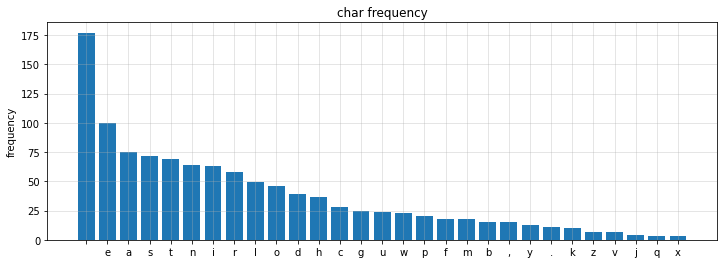

' ,.abcdefghijklmnopqrstuvwxyz'

In [3]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re

text = """John quickly realized that the fox was jumping over a brown fence. Meanwhile, the lazy dog slept under the warm sun, dreaming of chasing squirrels in the park. A wizard in a distant land cast spells to levitate objects and summon mystical creatures. The gym was full of athletes lifting weights, running on treadmills, and practicing yoga poses. Buzzing bees were collecting nectar from vibrant flowers, while a group of birds sang harmoniously from the treetops. In the city, cars zoomed by as people hurried to work, their minds filled with tasks and deadlines. The library was a sanctuary of knowledge, where students pored over books and researchers delved into ancient manuscripts. A chef in a bustling kitchen prepared exquisite dishes, skillfully chopping vegetables and grilling meats. At the beach, waves crashed against the shore as children built sandcastles and surfers rode the swells. In the forest, a lumberjack wielded his axe, cutting down trees for timber. The night sky was a tapestry of stars, constellations, and planets, inspiring wonder and awe in all who gazed upon it."""

text = text.lower()
char_count = dict(sorted(Counter(text).items(), key=lambda x: x[1], reverse=True))

fig, ax = plt.subplots(1,1,figsize=(12, 4))
ax.set_title('char frequency')
ax.bar(*zip(*char_count.items()))
ax.set_ylabel('frequency')
ax.grid(alpha=.4)
plt.show()

chars = ''.join(sorted(char_count.keys()))

c2i = lambda c: chars.index(c)
i2c = lambda i: chars[i]

chars

In [4]:
def splitter(text, delim="\."):
    split_text = re.split(f'({delim})', text)
    return [(split_text[i] + split_text[i+1]).strip() for i in range(0, len(split_text)-1, 2)]

sentences = splitter(text)

unigrams = []
for sentence in sentences:
    for i in range(len(sentence)):
        unigrams.append([sentence[i]])
print(f"{unigrams = }")

bigrams = []
for sentence in sentences:
    for i in range(len(sentence)-1):
        bigrams.append([sentence[i], sentence[i+1]])
print(f"{bigrams  = }")

trigrams = []
for sentence in sentences:
    for i in range(len(sentence)-2):
        trigrams.append([sentence[i], sentence[i+1], sentence[i+2]])
print(f"{trigrams = }")

unigrams = [['j'], ['o'], ['h'], ['n'], [' '], ['q'], ['u'], ['i'], ['c'], ['k'], ['l'], ['y'], [' '], ['r'], ['e'], ['a'], ['l'], ['i'], ['z'], ['e'], ['d'], [' '], ['t'], ['h'], ['a'], ['t'], [' '], ['t'], ['h'], ['e'], [' '], ['f'], ['o'], ['x'], [' '], ['w'], ['a'], ['s'], [' '], ['j'], ['u'], ['m'], ['p'], ['i'], ['n'], ['g'], [' '], ['o'], ['v'], ['e'], ['r'], [' '], ['a'], [' '], ['b'], ['r'], ['o'], ['w'], ['n'], [' '], ['f'], ['e'], ['n'], ['c'], ['e'], ['.'], ['m'], ['e'], ['a'], ['n'], ['w'], ['h'], ['i'], ['l'], ['e'], [','], [' '], ['t'], ['h'], ['e'], [' '], ['l'], ['a'], ['z'], ['y'], [' '], ['d'], ['o'], ['g'], [' '], ['s'], ['l'], ['e'], ['p'], ['t'], [' '], ['u'], ['n'], ['d'], ['e'], ['r'], [' '], ['t'], ['h'], ['e'], [' '], ['w'], ['a'], ['r'], ['m'], [' '], ['s'], ['u'], ['n'], [','], [' '], ['d'], ['r'], ['e'], ['a'], ['m'], ['i'], ['n'], ['g'], [' '], ['o'], ['f'], [' '], ['c'], ['h'], ['a'], ['s'], ['i'], ['n'], ['g'], [' '], ['s'], ['q'], ['u'], ['i'], ['r'], [

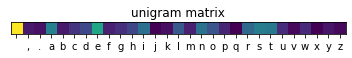

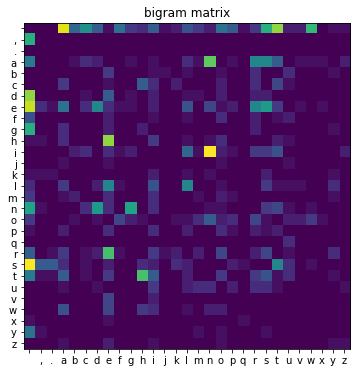

In [5]:
import plotly.graph_objects as go

def ngram_matrix(ngrams):
    assert len(ngrams) > 0
    dim = len(ngrams[0])
    matrix = np.zeros([len(chars)]*dim)
    for ngram in ngrams:
        matrix[tuple(map(c2i, ngram))] += 1
    return matrix

plt.figure(figsize=(6,6))
plt.title("unigram matrix")
plt.imshow(ngram_matrix(unigrams).reshape(1,-1))
plt.xticks(range(len(chars)), list(chars))
plt.yticks([])
plt.show()

plt.figure(figsize=(6,6))
plt.title("bigram matrix")
plt.imshow(ngram_matrix(bigrams))
plt.xticks(range(len(chars)), list(chars))
plt.yticks(range(len(chars)), list(chars))
plt.show()

# Create a 5x5x5 array filled with random values
data = ngram_matrix(trigrams)
data = np.log(data + 1e-8)

# Create x, y, z coordinates
x, y, z = np.indices(data.shape)

# Create a 3D scatter plot
fig = go.Figure(data=go.Scatter3d(
    x=x.flatten(),
    y=y.flatten(),
    z=z.flatten(),
    mode='markers',
    marker=dict(
        size=8,
        color=data.flatten(),  # set color to an array/list of desired values
        colorscale='Viridis',  # choose a colorscale
        opacity=0.1
    ),
))

# Update plot layout
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis=dict(range=[0, len(chars)], tickvals=list(range(len(chars))), ticktext=list(chars)),
        yaxis=dict(range=[0, len(chars)], tickvals=list(range(len(chars))), ticktext=list(chars)),
        zaxis=dict(range=[0, len(chars)], tickvals=list(range(len(chars))), ticktext=list(chars))
    )
)

fig.show()

In [6]:
unigram_matrix = ngram_matrix(unigrams)
bigram_matrix = ngram_matrix(bigrams)
trigram_matrix = ngram_matrix(trigrams)

sequence = []
for _ in range(100):
    if len(sequence) == 0:
        while True:
            p = unigram_matrix
            p = p / p.sum()
            c = np.random.choice(list(chars), p=p)
            if c not in " ,.":
                break
    elif len(sequence) == 1:
        i = c2i(sequence[-1])
        p = bigram_matrix[i]
        p = p / p.sum()
        c = np.random.choice(list(chars), p=p)
    else:
        i, j = c2i(sequence[-2]), c2i(sequence[-1])
        p = trigram_matrix[i,j]
        p = p / p.sum()
        c = np.random.choice(list(chars), p=p)
    
    sequence.append(c)
    if c == '.':
        break

print(''.join(sequence))

taskills.


### Embedding


#### Skip-gram

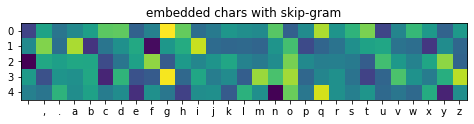

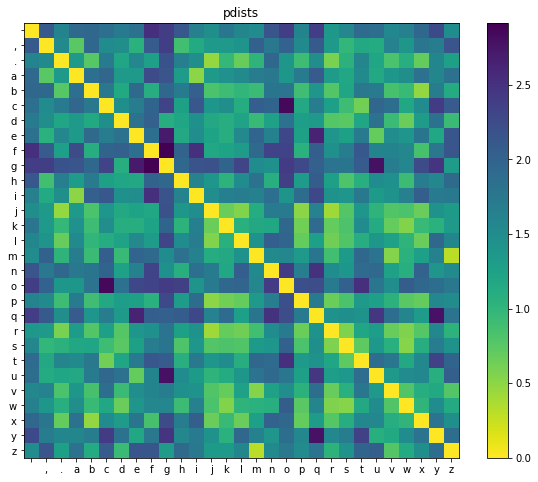

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

X = []
context_size = 2
for sentence in sentences:
    for i in range(context_size, len(sentence)-context_size):
        for offset in range(-context_size, context_size+1):
            if offset == 0:
                continue
            X.append([c2i(sentence[i]), c2i(sentence[i+offset])])

class SkipGram(nn.Module):
    def __init__(self, vocab_size=len(chars), embedding_dim=5):
        super().__init__()
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim

        self.embedding = nn.Embedding(num_embeddings=self.vocab_size,
                                      embedding_dim=self.embedding_dim)
        self.linear = nn.Linear(in_features=self.embedding_dim,
                                out_features=self.vocab_size)
        
        nn.init.xavier_uniform_(self.embedding.weight)
        nn.init.xavier_uniform_(self.linear.weight)
    
    def forward(self, x):
        x = self.embedding(x)
        x = self.linear(x)
        return x

skipgram = SkipGram()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(skipgram.parameters(), lr=0.1)

skipgram.train()
for e in range(200):
    running_loss = 0
    count = 0
    for x, y in DataLoader(X, batch_size=32, shuffle=True):
        count += 1
        optimizer.zero_grad()

        y_hat = skipgram(x)
        loss = criterion(y_hat, y)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"[epoch {e+1:0>3}] {running_loss/count:7.5f}", end='\r')

plt.figure(figsize=(8,4))
plt.title('embedded chars with skip-gram')

embedded_chars = skipgram.embedding(torch.arange(0, skipgram.vocab_size)).detach().numpy()
plt.imshow(embedded_chars.T)

plt.xticks(range(len(chars)), list(chars))
plt.yticks(range(skipgram.embedding_dim))
plt.show()

plt.figure(figsize=(10,8))
plt.title('pdists')
plt.imshow(torch.cdist(torch.tensor(embedded_chars), torch.tensor(embedded_chars)), cmap='viridis_r')
plt.xticks(range(len(chars)), list(chars))
plt.yticks(range(len(chars)), list(chars))
plt.colorbar()
plt.show()

#### CBOW (continuous bag of words)

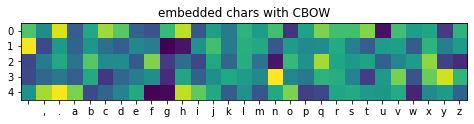

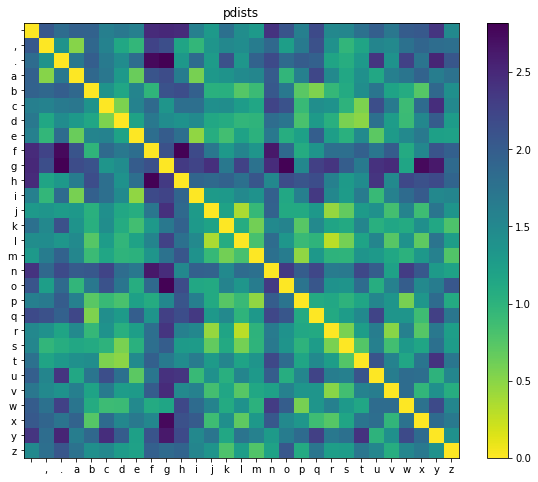

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

X = []
context_size = 2
for sentence in sentences:
    for i in range(context_size, len(sentence)-context_size):
        for offset in range(-context_size, context_size+1):
            if offset == 0:
                continue
            X.append([c2i(sentence[i+offset]), c2i(sentence[i])])

class CBOW(nn.Module):
    def __init__(self, vocab_size=len(chars), embedding_dim=5):
        super().__init__()
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim

        self.embedding = nn.Embedding(num_embeddings=self.vocab_size,
                                      embedding_dim=self.embedding_dim)
        self.linear = nn.Linear(in_features=self.embedding_dim,
                                out_features=self.vocab_size)
        
        nn.init.xavier_uniform_(self.embedding.weight)
        nn.init.xavier_uniform_(self.linear.weight)
    
    def forward(self, x):
        x = self.embedding(x)
        x = self.linear(x)
        return x

cbow = CBOW()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cbow.parameters(), lr=0.1)

cbow.train()
for e in range(200):
    running_loss = 0
    count = 0
    for x, y in DataLoader(X, batch_size=32, shuffle=True):
        count += 1
        optimizer.zero_grad()

        y_hat = cbow(x)
        loss = criterion(y_hat, y)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"[epoch {e+1:0>3}] {running_loss/count:7.5f}", end='\r')

plt.figure(figsize=(8,4))
plt.title('embedded chars with CBOW')

embedded_chars = cbow.embedding(torch.arange(0, cbow.vocab_size)).detach().numpy()
plt.imshow(embedded_chars.T)

plt.xticks(range(len(chars)), list(chars))
plt.yticks(range(cbow.embedding_dim))
plt.show()

plt.figure(figsize=(10,8))
plt.title('pdists')
plt.imshow(torch.cdist(torch.tensor(embedded_chars), torch.tensor(embedded_chars)), cmap='viridis_r')
plt.xticks(range(len(chars)), list(chars))
plt.yticks(range(len(chars)), list(chars))
plt.colorbar()
plt.show()

In [9]:
class RNNCell(nn.Module):
    def __init__(self, input_dim=5, hidden_dim=4, output_dim=len(chars)):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim

        self.w_ih = nn.Parameter(torch.randn(hidden_dim, input_dim, dtype=torch.float32) * 0.01, requires_grad=True)
        self.w_hh = nn.Parameter(torch.randn(hidden_dim, hidden_dim, dtype=torch.float32) * 0.01, requires_grad=True)
        self.b_hh = nn.Parameter(torch.zeros(hidden_dim, dtype=torch.float32), requires_grad=True)
        self.tanh = nn.Tanh()

        self.linear = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, hx):
        z = torch.cat([x, hx], dim=1).T
        w = torch.cat([self.w_ih, self.w_hh], dim=1)
        z = (w @ z).T
        z = z + self.b_hh
        hx = self.tanh(z)

        z = self.linear(hx)

        return z, hx


In [10]:
X = []
window_size = 8
for sentence in sentences:
    sentence = list(map(c2i, sentence))
    for i in range(len(sentence)-window_size-1):
        X.append([sentence[i:i+window_size], sentence[i+1:i+window_size+1]])
X = torch.tensor(X)
X.shape

torch.Size([984, 2, 8])

tensor([[ 0.8855,  1.5099, -0.0371,  0.3441],
        [ 0.7095, -0.5732,  1.6488, -2.2117]])